## Random Forest

### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset['Purchased']

### Splitting the dataset into the Training and Test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_test = np.array(y_test)

### Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the Random Forest model

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0, n_estimators=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

### Prediction a new result

In [8]:
prediction = classifier.predict(np.array([X_test[0, :]])) # type: ignore
print('Classifier is right? - {}'.format(prediction == y_test[0]))

Classifier is right? - [ True]


### Predicting the Test set results

In [9]:
y_predicted = np.array(classifier.predict(X_test))
# print(np.concatenate((y_predicted.reshape(len(y_predicted), 1), y_test.reshape(len(y_test), 1)), axis=1))

### Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_pred=y_predicted, y_true=y_test)
print(confusion_matrix) 

accuracy_score = accuracy_score(y_true=y_test, y_pred=y_predicted)
print('Percent of matches = {}'.format(accuracy_score))

[[64  4]
 [ 4 28]]
Percent of matches = 0.92


### Visualizing the Training set results 

/var/folders/cf/jwy0c4s50112j4n35pczmxgc0000gn/T/ipykernel_10588/1446648445.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


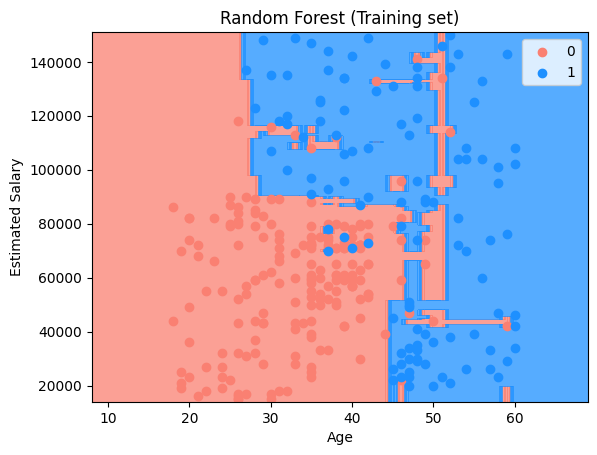

In [11]:
# Copypasted code from the course
from matplotlib.colors import ListedColormap
X_set, y_set = np.array(scaler.inverse_transform(X_train)), np.array(y_train)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing the Test set results

/var/folders/cf/jwy0c4s50112j4n35pczmxgc0000gn/T/ipykernel_10588/1839536867.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


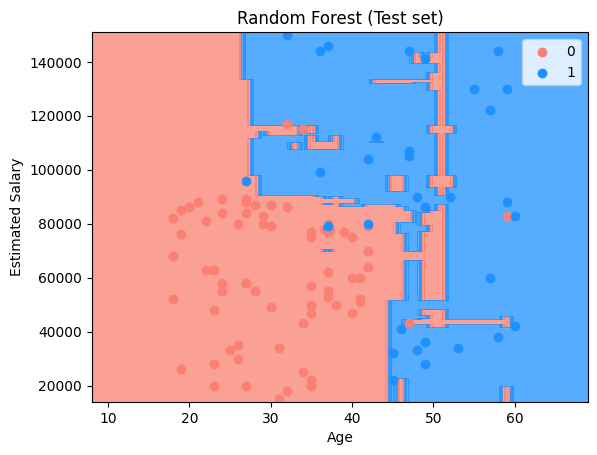

In [12]:
# Copypasted code from the course
from matplotlib.colors import ListedColormap
X_set, y_set = np.array(scaler.inverse_transform(X_test)), np.array(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()